In [6]:
%matplotlib inline
from matplotlib import pylab as plt

### Make sure you have the geoserver VM running

this should show something like:

```
Current machine states:

geoserver                 running (virtualbox)

The VM is running. To stop this VM, you can run `vagrant halt` to
shut it down forcefully, or you can run `vagrant suspend` to simply
suspend the virtual machine. In either case, to restart it again,
simply run `vagrant up`.
```

You can do this by going to the geoserver/ directory and running ```vagrant up```

In [ ]:
!cd ../geoserver && vagrant status

### Display geoserver status

This should ensure the client can successfully connect to your VM,  if you do not see the Geoserver 'Status' page then something is wrong!

In [ ]:
from IPython.core.display import display, HTML
from geonotebook.config import Config
geoserver = Config().vis_server
display(HTML(geoserver.c.get("/about/status").text))

### Get the rgb.tif file from data.kitware.com

In [ ]:
!wget -O /tmp/rgb.tif https://data.kitware.com/api/v1/file/57bf01ff8d777f10f269cff4/download

### Add the layer to the map

In [1]:
## Proposed API moving forward ##
from geonotebook.wrappers import GeoTiffImage
gt = GeoTiffImage("/tmp/rgb.tif")

In [2]:
gt

In [3]:
# gt.describe()

# M.add_layer(gt.bands([0, 1, 2],  range=[(0, 1), (0, 1), (0, 1)], opacity=0.5))

M.add_layer(gt)

In [4]:
M.layers['rgb'].region

array([[[ 0.0232,  0.0422,  0.0244],
        [ 0.0253,  0.0443,  0.0268],
        [ 0.0176,  0.0383,  0.0274],
        ..., 
        [ 0.013 ,  0.0344,  0.0169],
        [ 0.0168,  0.0343,  0.0249],
        [ 0.0165,  0.0344,  0.0203]],

       [[ 0.0266,  0.0364,  0.0252],
        [ 0.0157,  0.0308,  0.0213],
        [ 0.0195,  0.0346,  0.0244],
        ..., 
        [ 0.0116,  0.0223,  0.0177],
        [ 0.0078,  0.0223,  0.0177],
        [ 0.0097,  0.0223,  0.0177]],

       [[ 0.0195,  0.0346,  0.0213],
        [ 0.0157,  0.0383,  0.0244],
        [ 0.0195,  0.0383,  0.0244],
        ..., 
        [ 0.0097,  0.0298,  0.0238],
        [ 0.0144,  0.0264,  0.015 ],
        [ 0.0109,  0.0265,  0.0167]],

       ..., 
       [[ 0.0146,  0.0311,  0.0222],
        [ 0.022 ,  0.0462,  0.0397],
        [ 0.0145,  0.0274,  0.0214],
        ..., 
        [ 0.0085,  0.0111,  0.0057],
        [ 0.0085,  0.0111,  0.0057],
        [ 0.0105,  0.0149,  0.0087]],

       [[ 0.0262,  0.0448,  0.0387]

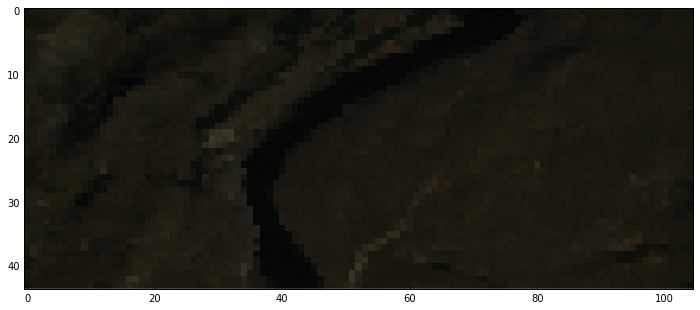

In [8]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 12))

# Display BRG
# n = M.layers['rgb'].region

# Flip the second axis to get RGB
n = np.apply_along_axis(np.flipud, 2, M.layers['rgb'].region)
ax.imshow(n, interpolation='none')

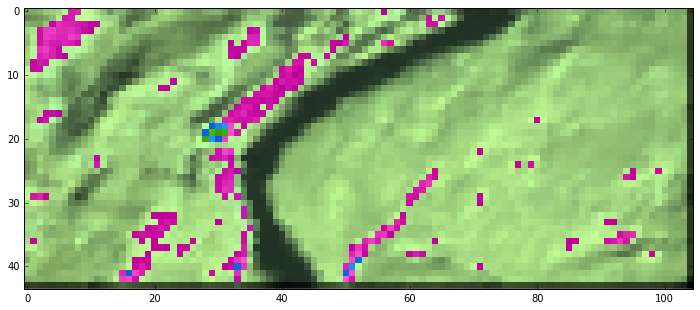

In [9]:
from scipy import ndimage
fig, ax = plt.subplots(figsize=(12, 12))

k = np.array([[[1, 1, 1], [1, 1, 1], [0, 0, 0]],
              [[1, 1, 1], [0, 0, 0], [0, 0, 0]],
              [[0, 0, 0], [0, 0, 0], [0, 0, 0]]])

ax.imshow(ndimage.convolve(n, k, mode='constant', cval=0.0), interpolation='none')

In [9]:
M.remove_layer('rgb')

In [ ]:
M.layers